<a href="https://colab.research.google.com/github/deklismam/portfolio_datascience/blob/master/An%C3%A1lise_de_dados_Airbnb_Oslo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Análise de dados Airbnb - Olso

https://turistaprofissional.com/wp-content/uploads/2017/04/o-que-visitar-em-oslo.jpg
*Galeria Nacional (Nationalgallerie) de Oslo, no bairro de Sentrum*

Apesar de estar no mercado desde 2008, conheci a Airbnb muito recentemente, ao buscar casas para passar o final de semana longe do estresse da cidade de São Paulo.

De forma simples, prática e com mínima burocracia, é possível alugar casas, apartamentos e até mesmo quartos para dividir em diversas cidades **do mundo**. Além disso, é fácil comparar preço, locais, anfitriões e reviews de outras pessoas que já se hospedaram no local, sendo esta última uma ferramenta indispensável àqueles que buscam segurança e confiabilidade em suas locações.

Inspirado em um desejo próprio de visitar a cidade, escolhi analisar os dados de Oslo, na Noruega. Antes que perguntem, não, não é pela liberação da venda de um certo psicotrópico. O motivo é mais... literário: adoro os livros de Jostein Gaarder, autor de O Mundo de Sofia e A Garota das Laranjas - meu livro favorito - ambientado na cidade de Oslo, sendo este ambientadona cidade, o que me deixou extremamente curioso para visitá-la.

Neste *notebook* analisarei os dados da cidade de Oslo, Noruega, para ver quais *insights* podem ser extraídos a partir dos dados brutos, além de já estudar média de preços para uma futura (e primeira) viagem ao exterior. 

A ferramenta utilizada para tal é o [Colab](colab.research.google.com), totalmente online, que necessita apenas de uma conta *Gmail* para se ter acesso.


### Obtenção de Dados

Todos os dados aqui utilizados foram retirados do site [Inside Airbnb](http://insideairbnb.com/get-the-data.html), de acesso gratuito. que conta com dados de diversas cidades do mundo.

Para esta análise de dados brutos, utilizou-se o arquivo:
* listings.csv - *Summary information and metrics for listings in Oslo (good for visualisations)*

O arquivo foi importado diretamente pelo site da Airbnb, sem necessidade de *download*, por meio dos comandos abaixo.

In [0]:
# importar os pacotes necessários para a análise dos dados
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [0]:
# importar o arquivo listings.csv da cidade de Oslo para um DataFrame

df = pd.read_csv ("http://data.insideairbnb.com/norway/oslo/oslo/2019-11-29/visualisations/listings.csv")

### Análise dos Dados

Em primeira instância, verifica-se o dataset a ser trabalhado, observando os parâmetros e suas características, total de dados e possíveis discrepâncias que afetatem a análise dos dados.

A última atualização dos dados de Oslo foram de 29 de novembro de 2019.

# Descrição das variáveis

O arquivo *listings.csv* trabalhado apresenta 16 parâmetros de 8604 imóveis.


In [34]:
# identificar o volume de dados d DataFrame
print("Parâmetros:\t {}".format(df.shape[1]))
print("Imóveis:\t {}".format(df.shape[0]))

# verificar os tipos de parâmetros do dataset
display(df.dtypes)

Parâmetros:	 16
Imóveis:	 8604


id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

* `id` - número do id que identifica o imóvel no sistema do Airbnb;
* `name` - nome do imóvel, como aparece no site;
*`host_id` - nome do anfitrião/proprietário do imóvel;
* `neighbourhood_group` - parâmetro sem valores válidos;
* `neighbourhood` - nome do bairro;
* `latitude` - latitude de onde se encontra o imóvel;
* `longitude` - longitude de onde se encontra o imóvel;
* `room_type` - tipo de dormitório oferecido. Pode ser "Entire home/apt", "Private room", "Shared room" e "Hotel room";
* `price` - preço do aluguel do imóvel, em moeda local;
* `minimun_nights` - quantidade mínima de noites para reservar;
* `number_of_reviews` - número de reviews que o imóvel possui;
* `last_review` - data do último review recebido;
* `reviews_per_month` - quantidade de reviews recebidos por mês
* `calculated_host_listings_count` - quantidade de imóveis do mesmo anfitrião;
* `availability_365` - número de dias de disponibilidade do imóvel dentro de 365 dias.


Para fins de ilustração, apresento o *dataset* dos cinco primeiros imóveis do *listing.csv*. Em seguida, o comando para descobrir quais valores o parâmetro `room_type` pode assumir.

In [35]:
# mostrar os cinco primeiros imóveis do listing.csv
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,42932,"Charming apartment, Oslo Center, Ro",187463,Cecilie,nan,Frogner,59.91,10.72,Entire home/apt,2000,3,37,2019-06-19,0.49,1,360
1,43198,Lovely low budgetroom in nice area!,4011871,Mona Johanne,nan,Frogner,59.92,10.71,Private room,385,2,36,2019-07-28,0.67,2,0
2,69964,Lovely flat in Oslo city centre,175633,Kris,nan,Sagene,59.94,10.77,Entire home/apt,1009,30,7,2013-05-18,0.07,1,363
3,71725,Central big room - ap with balcony,368229,Reidun,nan,Gamle Oslo,59.91,10.78,Private room,504,4,49,2019-11-09,0.46,1,333
4,77108,Friendly & spacious in uptown Oslo,412523,Gunn Hild,nan,Frogner,59.92,10.72,Entire home/apt,1917,7,14,2018-08-13,0.13,1,351


In [36]:
# mostrar os diversos valores que o parâmetro room_type pode adquirir
df['room_type'].unique()

array(['Entire home/apt', 'Private room', 'Shared room', 'Hotel room'],
      dtype=object)

# Dados ausentes no *dataset*

Como parte inicial do tratamento dos dados, observa-se a ausência de determinados parâmetros nos imóveis estudados e sua significância em relação ao total de entradas. Para tanto, aplica-se o comando abaixo. Os dados apresentados estão em percentagem:

In [37]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes. Valores iguais a 100 dizem ausência total de dados.
print ("      Parâmetros                Percentagem de nulos (%)")
pd.options.display.float_format = '{:,.2f}'.format
(df.isnull().sum()/df.shape[0]*100).sort_values(ascending=False)

# de modo a mostrar os dados com apenas duas casas decimais, é aplicado o código intermediário. O comando é válido para todo o procedimento

      Parâmetros                Percentagem de nulos (%)


neighbourhood_group              100.00
reviews_per_month                 20.63
last_review                       20.63
name                               0.23
host_name                          0.08
availability_365                   0.00
calculated_host_listings_count     0.00
number_of_reviews                  0.00
minimum_nights                     0.00
price                              0.00
room_type                          0.00
longitude                          0.00
latitude                           0.00
neighbourhood                      0.00
host_id                            0.00
id                                 0.00
dtype: float64

Como é possível observar, o parâmetro `neighbourhood_group` não contém valores para nenhum dos imóveis sendo, portanto, descartável.

Observa-se também que apenas 20,63% dos imóveis não possuem qualquer review



# Distribuição das variáveis e averiguação de *outliers*

Para averiguar como estão distribuídos os dados e se há *outliers*, plota-se os dados em histogramas e observa-se a distribuição.

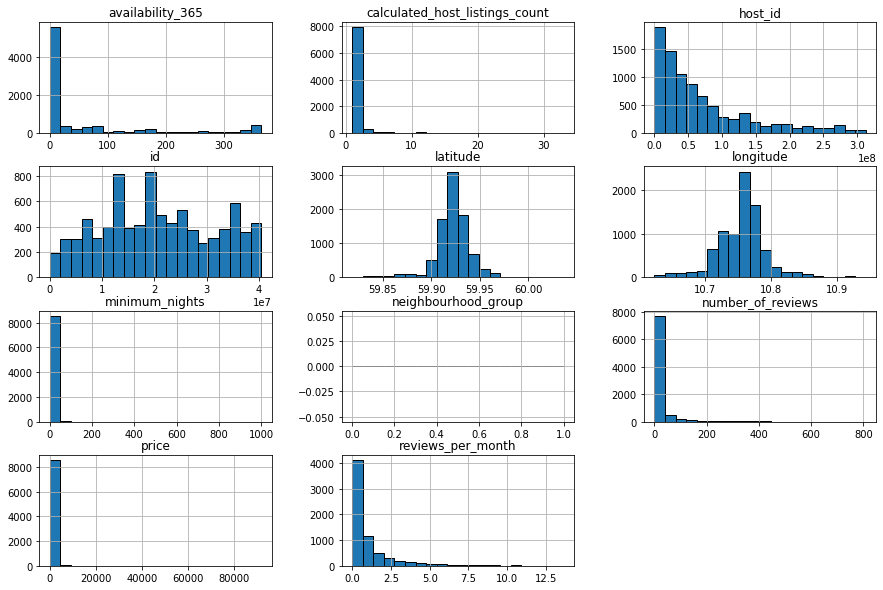

In [38]:
# plotar histogramas dos parâmetros numéricos
df.hist(bins=20, figsize=(15,10), edgecolor='black');

Um olhar atento aos histogramas revelam alguns indícios de *outliers*, tais como:
* parâmetro `price` com distribuição extremamente homogênea, com seu eixo horizontal chegando a mais de 80000 coroas norueguesas;

* pode-se dizer o mesmo do parâmetro `minimum_nights`. Ora, não faz sentido ter um aluguel mínimo de casa por 1000 dias em um site de aluguel para viagens.

Para confirmar os *outliers*, observemos os parâmetros estatísticos dos dados por meio do comando `describe()` e a distribuição dos parâmetros suspeitos em `boxplots`.

In [39]:
# ver o resumo estatístico dos parâmetros numéricos

df[['price', 'minimum_nights']].describe()


,price,minimum_nights
count,"8,604.00","8,604.00"
mean,925.83,4.27
std,"1,691.92",18.37
min,83.00,1.00
25%,523.00,2.00
50%,752.00,2.00
75%,"1,000.00",3.00
max,"91,721.00","1,000.00"


Apenas observando os valores máximos de `price`e `minimum_nigths` e comparando com a média vemos uma enorme disparidade. Outro fator que corrobora termos *outliers* é o fato de 75% dos dados estão abaixo de 1000 coroas norueguesas e 3 noites, enquanto o máximo é 91721 coroas norueguesas e 1000 noites, respectivamente.

Concluida a análise de haver *outliers*, há de confirmar a partir de que valor removê-los. Para tal, analisa-se a distribuição em boxplots dos dois parâmetros.

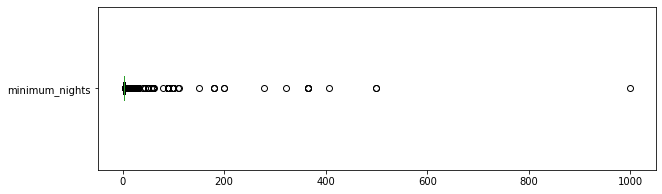

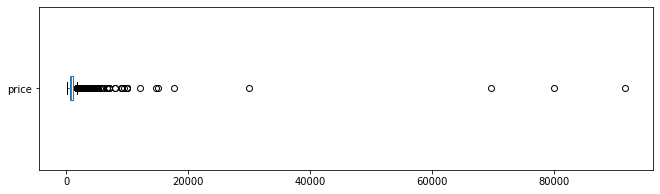

In [40]:
# boxplot minimum_nights

df.minimum_nights.plot(kind='box', vert=False, figsize=(10,3))
plt.show()
df.price.plot(kind = 'box', vert=False, figsize = (11,3))
plt.show()

Nos boxplots acima observa-se bem que muito poucos dados encontram-se fora da média e mediana. 
Após alguns testes, considerou-se que o preço superior a 2000 coroas norueguesas e noites mínimas superiores a 10 são *outliers* e, portanto, podem ser removidos do conjunto de dados.

Os comandos utilizados para se obter a partir de que valor os dados são considerados *outliers* estão abaixo.

In [41]:
# ver quantidade de valores acima de 10 dias para minimum_nights
print("minimum_nights - entradas com valores acima de 10 dias: {}".format(len(df[df.minimum_nights > 10])))
print("{:.2f}%".format(len(df[df.minimum_nights > 10])/df.shape[0]*100))

# ver quantidade de valores acima de 2000 coroas norueguesas para price
print("price - entradas com valores acima de 2000 coroas norueguesas: {}".format(len(df[df.price > 2000])))
print("{:.2f}%".format(len(df[df.price > 2000])/df.shape[0]*100))

minimum_nights - entradas com valores acima de 10 dias: 330
3.84%
price - entradas com valores acima de 2000 coroas norueguesas: 333
3.87%


# Dados sem *outliers*

Identificados os valores a partir dos quais os dados podem ser considerados *outliers*, observemos a distribuição em histograma com a ausência destes.

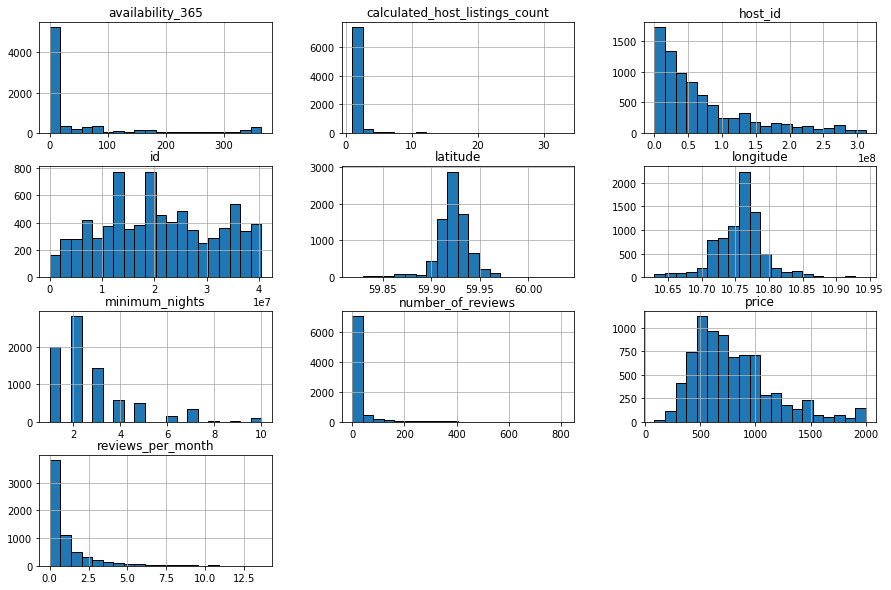

In [42]:
# remover os outliers para um novo DataFrame
df_clean = df.copy()
df_clean.drop(df_clean[df_clean.price > 2000].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.minimum_nights > 10].index, axis=0, inplace=True)

# remoção do neighbourhood_group, pois está vazio
df_clean.drop('neighbourhood_group', axis=1, inplace=True)

# plotar histograma para os parâmetros numéricas
df_clean.hist(bins=20, figsize=(15,10), edgecolor='black');


# Correlação existente entre os parâmetros

Pode-se calcular a correlação existente entre os diversos parâmetros estudados a partir da matriz de correlação, que abraça valores de -1 a 1. Valores próximos de 1 indicam relação linear diretamente proporcional, enquanto que valores negativos relatam uma relação linear inversamente proporcional: quando um aumenta, o outro diminui. Valores próximos de zero indicam relação não linear.

Para efeitos ilustrativos, gerou-se um *heatmap* com os parâmetros numéricos, usando a biblioteca `seaborn`.

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.00,0.14,-0.10,-0.11,0.03,0.12
minimum_nights,0.14,1.00,-0.17,-0.26,-0.06,-0.07
number_of_reviews,-0.10,-0.17,1.00,0.65,0.06,0.18
reviews_per_month,-0.11,-0.26,0.65,1.00,0.17,0.20
calculated_host_listings_count,0.03,-0.06,0.06,0.17,1.00,0.27
availability_365,0.12,-0.07,0.18,0.20,0.27,1.00


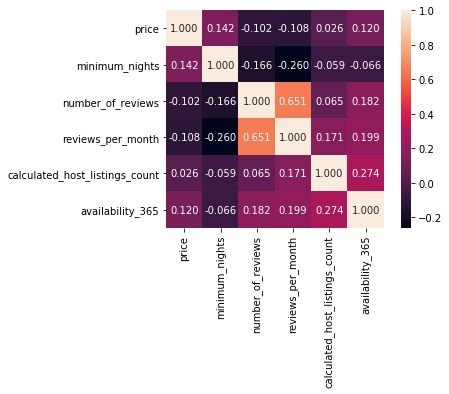

In [43]:
# criar uma matriz de correlação
corr = df_clean[['price','minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count','availability_365']].corr()
display(corr)
sns.heatmap(corr, fmt='.3f', square=True, linecolor='white', annot=True);

Analisando o *heatmap* observa-se que as correlações são próximas de zero, sendo o maior valor correspondente à correlação inversamente porporcional entre `minimum_nights` e `reviews_per_month`. Ora, quanto maior a quantidade mínima de noites a serem reservadas, menos pessoas alugam aquele local e, portanto, menor possibilidade de reviews.

Outro ponto importante é a correlação entre `availability_365` e `calculated_host_listings_count`. Relação também previsível, uma vez que quem tem mais imóveis para alugar, tem mais disponibilidade durante o ano.

Uma relação esperada mas não relatada é a de `price`e `number_of_reviews`, pois espera-se que casas mais baratas sejam mais alugadas e, portanto, tenham mais reviews. A relação que vemos entre estes parâmetros, contudo, é inversamente proporcional.

# O tipo de imóvel mais alugado em Oslo

Conta-se a quantidade de imóveis disponíveis conforme o tipo de moradia com o comando `value_counts`.


In [44]:
# mostrar quantidade de cada tipo de imóvel disponível
print ("Tipos de imóveis - Quantidade")
df_clean.room_type.value_counts()

Tipos de imóveis - Quantidade


Entire home/apt    6324
Private room       1533
Shared room          98
Hotel room            4
Name: room_type, dtype: int64

In [45]:
# mostrar os dados acima em percentagem
print("Tipos de imóveis - Percentagem do total (%)") 
df_clean.room_type.value_counts()/df_clean.shape[0]*100

Tipos de imóveis - Percentagem do total (%)


Entire home/apt   79.46
Private room      19.26
Shared room        1.23
Hotel room         0.05
Name: room_type, dtype: float64

Observa-se que quase 80% dos anúncios em Oslo são de casas inteiras ou apartamentos, ideal àqueles que desejam levar a família e passar um tempo com sua privacidade.

Os hotéis, por sua vez, representam menos de 1% do total, mostrando a baixa adesão deste tipo de imóvel ao site.

# Localidade mais cara de Oslo

Agora ao que interessa, resta saber qual o bairro mais caro da cidade que um dia visitarei.

In [46]:
# cálculo do valor médio de aluguel por bairro
mean_per_neighbourhood = df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)
print (mean_per_neighbourhood)

neighbourhood
Sentrum             952.72
Ullern              893.99
Frogner             869.31
Nordstrand          863.06
Nordre Aker         855.40
Vestre Aker         838.84
Marka               832.95
St. Hanshaugen      830.45
Grünerløkka         788.72
Gamle Oslo          776.98
Sagene              720.66
Østensjø            684.26
Stovner             657.33
Bjerke              638.58
Søndre Nordstrand   636.61
Grorud              572.77
Alna                548.58
Name: price, dtype: float64


In [54]:
# calculando a média geral de aluguel de imóvel em Olso
mean_per_neighbourhood.mean()

762.424833862953

O bairro de Sentrum (Centro, em tradução literal) é o que contém a média de aluguel de imóveis mais cara de toda Oslo, enquanto Alna - bairro mais a nordeste, quase nos limites da cidade - contém a mais barata.

A média de aluguel em toda a cidade de Olso é de 762,42 coroas norueguesas.

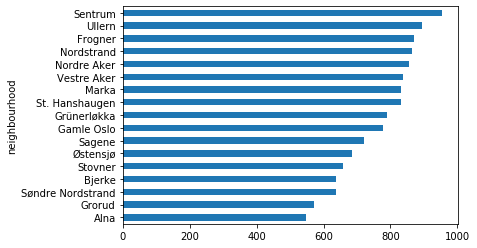

In [48]:
#histograma do valor médio de aluguel por bairro
df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=True).plot.barh();

Apenas a título de curiosidade, observemos a quantidade de casas para cada bairro em Oslo.

In [49]:
# contagem de imóveis em cada bairro
df.neighbourhood.value_counts()

Grünerløkka          1909
Gamle Oslo           1529
Frogner              1426
St. Hanshaugen       1118
Sagene                956
Nordstrand            284
Nordre Aker           265
Vestre Aker           238
Ullern                190
Østensjø              168
Sentrum               137
Alna                  119
Bjerke                110
Søndre Nordstrand      79
Grorud                 31
Marka                  23
Stovner                22
Name: neighbourhood, dtype: int64

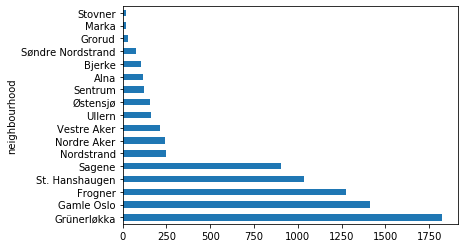

In [50]:
#histograma da quantidade de imóveis por bairro
df_clean.groupby(['neighbourhood']).neighbourhood.count().sort_values(ascending=False).plot.barh();

Em tabela não é possível observar um fato que no histograma salta aos olhos: há um aumento de imóveis disponíveis nos cinco primeiros bairros (Grünerløkka, Gamle Oslo, Frogner,
St. Hanshaugen, Sagene). Em uma busca simples no Google sobre estes bairros, constata-se que estão na região central da cidade, próximo aos centros turísticos.

Comparando estes bairros centrais com seus preços médios, observa-se que o bairro Sagene é o que possui menor valor médio de diária, a 720,66 coroas norueguesas. Em uma conversão realizada no dia 17 de fevereiro de 2020, a diária seria de R$ 336,68.

Vale lembrar que esta é uma análise superficial, na qual se trabalha com o preço médio dos alugueis. Há de se conferir, ainda, imóvel e suas condições, reviews, localidade dentro do bairro, entre outros. Porém, tenho agora um "norte" ao qual iniciar minhas pesquisas de viagem.

# Mapa dos imóveis por preço

O Airbnb nos auxilia em muito ao colocar a latitude e longitude dos imóveis apresentados no site. Com isto, é possível gerar um mapa do imóveis por localidade. Resolvi, também, associar sua localidade ao seu preço.

In [51]:
# plotar o mapa com a localização dos imóveis
import plotly.express as px
mapa = px.scatter_mapbox(df_clean, lat='latitude', lon='longitude', color_discrete_sequence=['black'], width=500, zoom=9, height=500)
mapa.update_layout(mapbox_style="open-street-map")

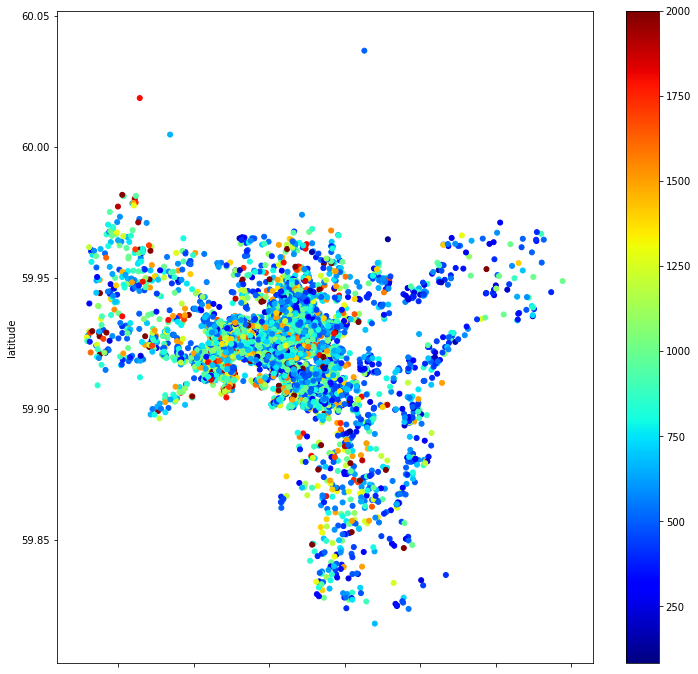

In [52]:
# plotar a localização dos imóveis

df_clean.plot(kind="scatter", x='longitude', y='latitude', alpha=20, c=df_clean['price'], s=25, 
              cmap=plt.get_cmap('jet'), figsize=(12,12))

No segundo mapa é possível observar a grande concentração de imóveis na parte central do mapa. Ora, trata-se da região central de Oslo. Esta é também a região onde se concentram os imóveis nos valores intermediários (750 a 1000 coroas norueguesas), sendo um forte indício de ser uma região com um excelente custo-benefício.

Conforme avançamos para as regiões periféricas, a localização dos imóveis ficam dispersas, embora a variabilidade de preços continuem.

## Conclusão

Apesar de se tratar de um projeto sem grande aprofundamento, já é possível observar um pouco do como que é o tratamento e análise de um banco de dados em *Data Science*.

Primeiramente, sempre há de se observar o banco de dados como um todo: parâmetros, quantidade de dados, quais parâmetros têm ou não valores, qual o significado de cada parâmetro, se há *outliers* para, então, trabalharmos com os dados.

Vimos também que o Centro (Sentrum) é o que possui a média de valores de aluguel mais cara, por se localizar exatamente ao centro da cidade, próximo a diversos centros turísticos (como a Nationalgallerie, da primeira imagem). Já o bairro com a média de alugueis mais baratos é o de Alna, bairro mais a leste de Oslo.

O bairro com a maior quantidade de imóveis é o de Grünerløkka, bairro vizinho ao Centro, a nordeste. Trata-se de um bairro grande, também próximo a diversos centros culturais, artísticos e turísticos da cidade.

Portanto, em uma futura visita à cidade de Oslo, sem dúvidas me hospedaria no bairro de Grünerløkka: possui várias opções de imóveis para a lugar e um preço médio de 800 coroas norueguesas por diária (aproximadamente R$ 400,00, na cotação de 15 de março de 2020) e ainda assim próximo ao Centro.